# Assignment : Advanaced regression

### Advanced Regression
The solution is divided into the following sections: 
1. Data understanding and exploration
2. Data cleaning
3. Data preparation
4. Model building and evaluation
    - Perform Regularization
     - Ridge Regression
     - Lasso Regression
5. Model Selection and Top Features

### 1. Data Understanding and Exploring

In [310]:
#Importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',2000)
pd.set_option('display.max_rows',2000)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.preprocessing import  StandardScaler

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [311]:
#Create a master dataset for our analysis
master_df=pd.read_csv('train.csv')
master_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [312]:
#Create a copy of master df to retain it later
working_df=master_df.copy()

In [313]:
#Get the Shape of the dataset
# We have 1460 rows and 81 columns: Thats a huge number of coloumns
working_df.shape

(1460, 81)

Here we can see a huge set of columns/variables in our dataset. Therefore, doing model selction is vital for our analysis and pickeing the right variables for our analysis is extremely important

### 2. Data Cleaning
Doing EDA on the dataset


In [314]:
#Plotting pair plot
working_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [315]:
#Get the null values
round(((working_df.isnull().sum())/len(working_df))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [316]:
# Getting Missing col percentage
df_col_perc = pd.DataFrame(working_df.isna().sum()/working_df.shape[0]*100, columns = ['MIS_PERC'])
df_col_perc.sort_values(by = 'MIS_PERC', ascending= False)

# df_col_perc.nlargest(n=15, columns='MIS_PERC')
Mis_col= df_col_perc.loc[df_col_perc['MIS_PERC']>0,:].sort_values(by='MIS_PERC',ascending=False)
Mis_col

,MIS_PERC
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


### Missing/NA values analysis
 - From the above we can see that alley,poolQC, Dence,MiscFeature has more than 80% of null-values.
 - Basically they are not nul-values
 - NA - in Alley means - No Alley access - So replacing NA with No Access
 - NA - in PoolQC means - No pool - So replacing NA with No Pool
 - NA - in fence means - No fence - So replacing NA with No fence
 - NA - in FireplaceQu means - No fire - So replacing NA with NF

Imputing Missing values of numeric columns first

In [317]:
# Imputation of Numeric missing data
from sklearn.preprocessing.imputation import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean')
working_df['LotFrontage'] = imputer.fit_transform(working_df[['LotFrontage']])
working_df['GarageYrBlt'] = imputer.fit_transform(working_df[['GarageYrBlt']])
working_df['MasVnrArea'] = imputer.fit_transform(working_df[['MasVnrArea']])

- From the above we can see that alley,poolQC, Dence,MiscFeature has more than 80% of null-values.
- Basically they are not nul-values
- NA - in Alley means - No Alley access - So replacing NA with No Access
- NA - in PoolQC means - No pool - So replacing NA with No Pool
- NA - in fence means - No fence - So replacing NA with No fence
- NA - in fence means - No fence - So replacing NA with No fence
- col_drop=['Alley','PoolQC','Fence','MiscFeature']
- working_df.drop(col_drop, axis=1, inplace=True)

In [318]:
#Null value treatment
working_df['Alley']=working_df['Alley'].replace(np.nan,'No Access')
working_df['PoolQC']=working_df['PoolQC'].replace(np.nan,'No Pool')
working_df['Fence']=working_df['Fence'].replace(np.nan,'No Fence')
working_df['MiscFeature']=working_df['MiscFeature'].replace(np.nan,'No Feature')
working_df['FireplaceQu']=working_df['FireplaceQu'].replace(np.nan,'NF')
working_df.MasVnrType.fillna(value='None', inplace=True)

# #Null value treatment
working_df['GarageType']=working_df['GarageType'].replace(np.nan,'No Garage')
working_df['GarageFinish']=working_df['GarageFinish'].replace(np.nan,'No Garage')
working_df['GarageQual']=working_df['GarageQual'].replace(np.nan,'No Garage')
working_df['GarageCond']=working_df['GarageCond'].replace(np.nan,'No Garage')
working_df['BsmtExposure']=working_df['BsmtExposure'].replace(np.nan,'No Basement')
working_df['BsmtFinType1']=working_df['BsmtFinType1'].replace(np.nan,'No Basement')
working_df['BsmtFinType2']=working_df['BsmtFinType2'].replace(np.nan,'No Basement')
working_df['BsmtQual']=working_df['GarageCond'].replace(np.nan,'No Basement')
working_df['BsmtCond']=working_df['BsmtCond'].replace(np.nan,'No Basement')
working_df.MasVnrType.fillna(value='None', inplace=True)
working_df.Electrical.fillna(value='None', inplace=True)


In [319]:
#Shape Check
working_df.shape

(1460, 81)

In [320]:
#Checking the non-null info
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [321]:
#MSSubClass','OverallQual','OverallCond' are actually categorical values
#So converting them to object type
col=['MSSubClass','OverallQual','OverallCond']
working_df[col] = working_df[col].astype('object')

In [322]:
#Selecting the datatypes for further EDA
working_df_object= working_df.select_dtypes(include='object')
working_df_num=working_df.select_dtypes(exclude='object')

In [323]:
#Check Object variables
(working_df_object.columns)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [324]:
#Check num variables
(working_df_num.columns)

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [325]:
#Creating Dummy variables
for col in (working_df_object.columns):
    working_df_object=pd.concat([working_df_object,pd.get_dummies(working_df_object[col],prefix=col)], axis=1)
working_df_object.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Garage,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heat

In [326]:
#Removing the Original variables after dummies creation from above dataset
colm= ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
working_df_object= working_df_object.drop(colm, axis=1)

In [327]:
#Check after dummies creation
working_df_object.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Garage,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,Firepl

In [328]:
#Removing Id column as it is not important
working_df_num.drop(['Id'], axis=1, inplace=True)

In [329]:
# Working on Year/Month features
#Getting max values of featues
col_dates=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
max_date_built= working_df_num['YearBuilt'].max()
max_date_remod= working_df_num['YearRemodAdd'].max()
max_date_yrSold=working_df_num['YrSold'].max()
max_date_GaYrBlt=working_df_num['GarageYrBlt'].max()

In [330]:
#Converting Years to number/numeric data for analysis
working_df_num['Year_diff']=max_date_built-working_df_num['YearBuilt']
working_df_num['YearRemod_diff']=max_date_remod-working_df_num['YearRemodAdd']
working_df_num['YearSold_diff']=max_date_yrSold-working_df_num['YrSold']
working_df_num['GarageYrBlt_diff']=max_date_GaYrBlt-working_df_num['GarageYrBlt']


In [331]:
#Check after New Year Variable conversion
working_df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Year_diff,YearRemod_diff,YearSold_diff,GarageYrBlt_diff
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,7,7,2,7.0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,34,34,3,34.0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,9,8,2,9.0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,95,40,4,12.0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,10,10,2,10.0


In [332]:
#Removing columns after conversion
col_dates=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
working_df_num.drop(col_dates, axis=1, inplace=True)

In [333]:
#Preparing input data for plotting Multiple boxplots for data visualization
#Dividing int and float numerics into min and max lists
col_min=[]
col_max=[]
for i in working_df_num.columns:
    if working_df_num[i].min()==0 and working_df_num[i].max()<=20:
        col_min.append(i)
    else:
        col_max.append(i)
print(len(col_min))
print(len(col_max))
print(len(working_df_num.columns))
col_min

9
25
34


['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YearSold_diff']

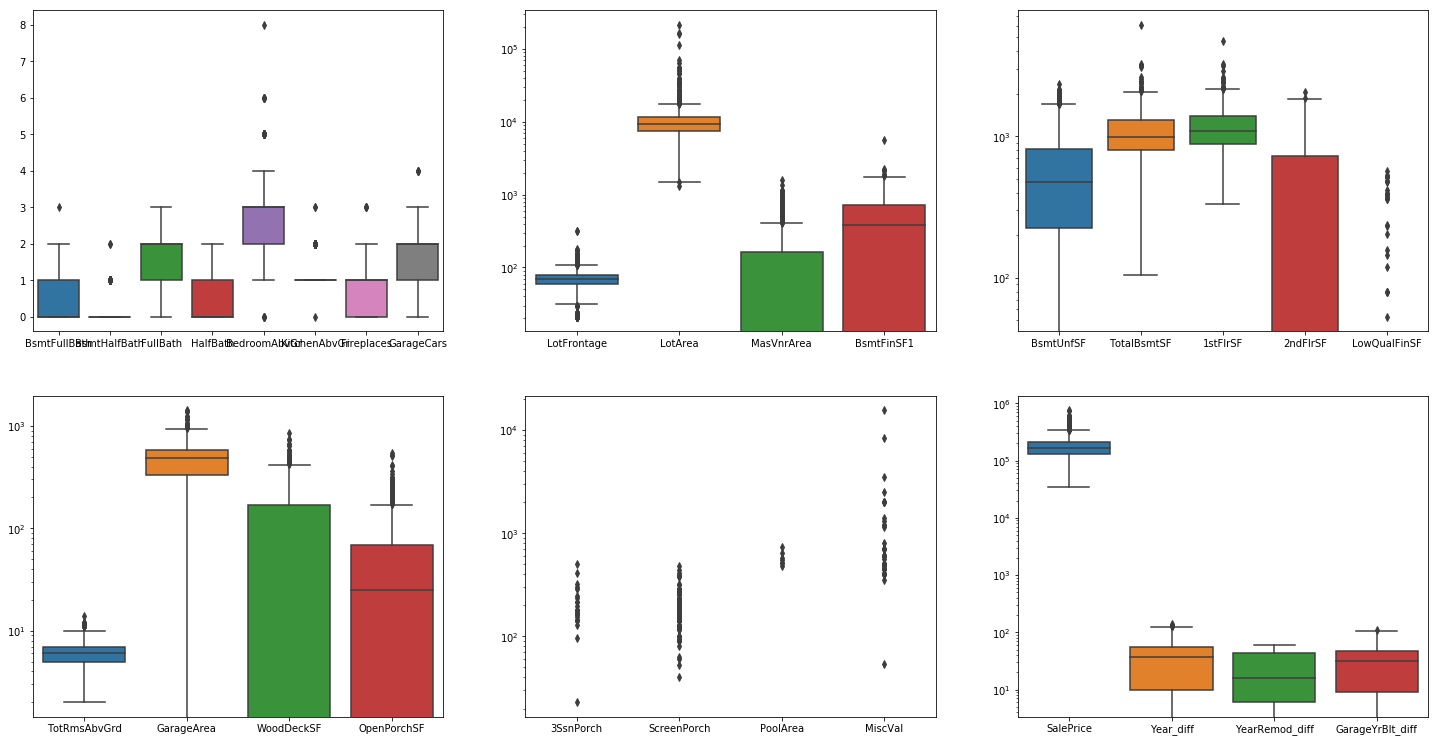

In [334]:
#Box Plot
#Checking the data for outliers
plt.figure(figsize=(25,13))

plt.subplot(2,3,1)
sns.boxplot(data=working_df_num[col_min].iloc[:,0:8])
plt.subplot(2,3,2)
plt.yscale('log')
sns.boxplot(data=working_df_num[col_max].iloc[:,0:4])
plt.subplot(2,3,3)
plt.yscale('log')
sns.boxplot(data=working_df_num[col_max].iloc[:,5:10])
plt.subplot(2,3,4)
plt.yscale('log')
sns.boxplot(data=working_df_num[col_max].iloc[:,11:15])
plt.subplot(2,3,5)
plt.yscale('log')
sns.boxplot(data=working_df_num[col_max].iloc[:,16:20])
plt.subplot(2,3,6)
plt.yscale('log')
sns.boxplot(data=working_df_num[col_max].iloc[:,21:25])
plt.show()

In [335]:
#check of num and obj datasets
print(len(working_df_num.columns))
print(len(working_df_object.columns))
working_df_num.columns

34
302


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Year_diff', 'YearRemod_diff', 'YearSold_diff',
       'GarageYrBlt_diff'],
      dtype='object')

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **Heat Map**.

In [336]:
#Get numeric variables from dataset
working_df_num.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Year_diff', 'YearRemod_diff', 'YearSold_diff',
       'GarageYrBlt_diff'],
      dtype='object')

In [337]:
# correlation matrix
cor = working_df_num.corr()

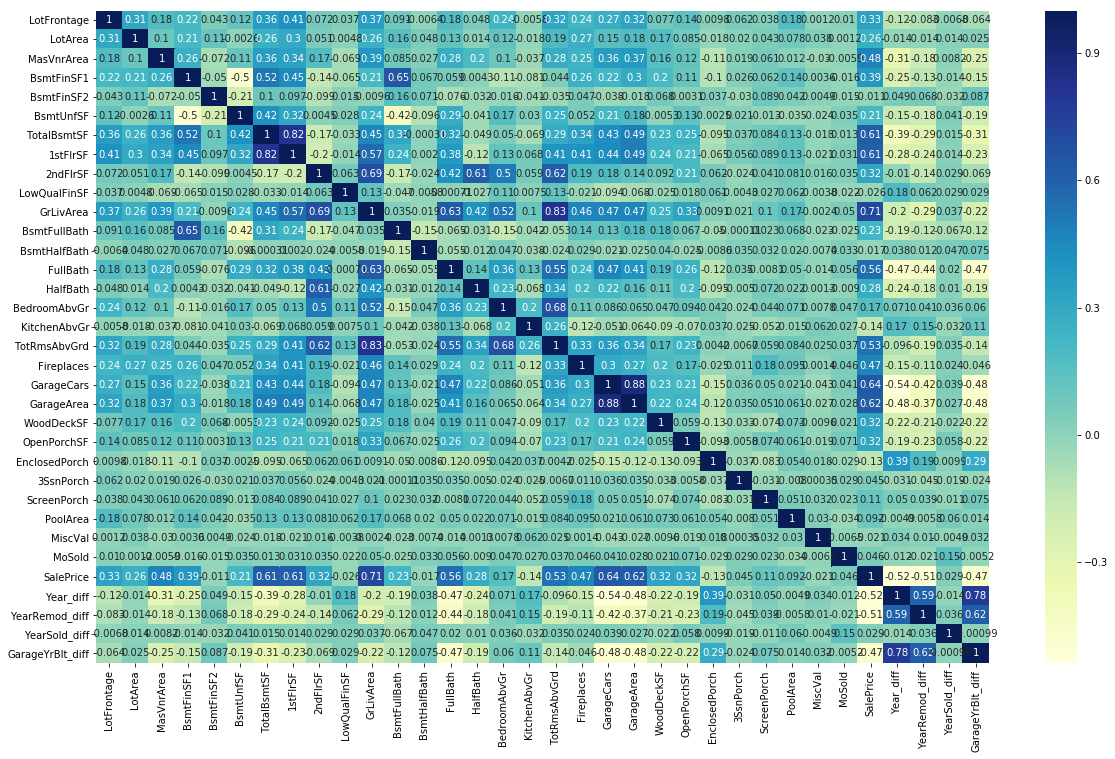

In [338]:
# plotting correlations on a heatmap
plt.figure(figsize=(20,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Correlation of price with independent variables:

- From above heat map we can clearly see that variables such as **'GrLivArea','FullBath','GarageCars','GarageArea','1stflrSF', and 'TotalBsmtSf'** are having **more than 0.60 correlation** where as **'Year_diff', 'YearRemod_diff','YearSold_diff', 'GarageYrBlt_diff'** have **-ve correlation**

Correlation among independent variables:

- Few independent variables such as ''TotRmsAbvGrd','BsmntFullBath' are highly correlated and are positively correlated 


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [339]:
# Final Dataframe ready for modelling after dummying and EDA analysis
df_model=pd.concat([working_df_num,working_df_object], axis=1)
df_model.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Year_diff,YearRemod_diff,YearSold_diff,GarageYrBlt_diff,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Garage,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,Hea

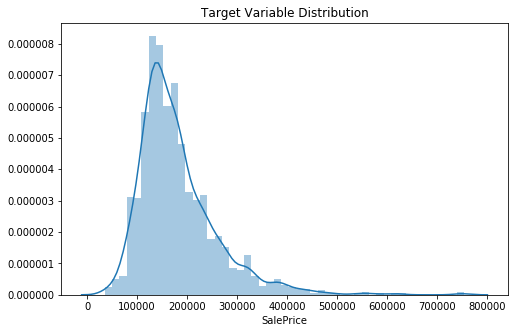

In [340]:
#Checking if the target variable is normally distributed
plt.figure(figsize=(8,5))
plt.title('Target Variable Distribution')
sns.distplot(working_df_num['SalePrice'])
plt.show()

We can see there is skewness in the target variable as the data is skwed left. So we need to perform some transformation so that the data becomes normally distributed

In [341]:
# Skewness check of target variable data
from scipy.stats import shapiro
response=df_model.SalePrice
shapiro(response)[1]

3.206247534576162e-33

In [342]:
#Skewness check of other independent variables
skew_features=working_df_num.skew().sort_values(ascending=False)
skewness=pd.DataFrame({'Skew': skew_features})
skewness.head()

,Skew
MiscVal,24.476794
PoolArea,14.828374
LotArea,12.207688
3SsnPorch,10.304342
LowQualFinSF,9.011341


A few of the variables like Misc value, Pool Area are highly right skewed due to lots of zeros, this is okay.
We can address skewed variables by transforming them (i.e. applying the same function to each value). 
Common transformations include square root (sqrt(x)), logarithmic (log(x)), and reciprocal (1/x). 
We’ll apply each in Python to the right-skewed response variable Sale Price.

#### Log Transformation

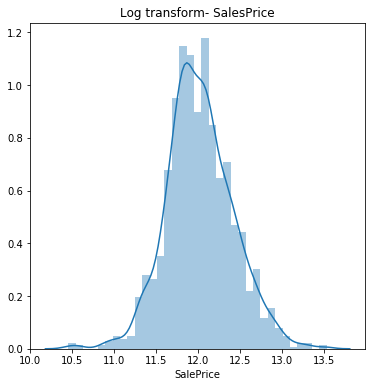

In [343]:
#Logarithmic Transformatopn of target variable
log_resp=np.log(response)
plt.title('Log transform- SalesPrice')
sns.distplot(log_resp)
plt.show()

The log transformation seems to be good, as the distribution of transformed sale prices is the most symmetrical and the tail is less compared with raw values

In [344]:
#Assign the transformed variables to target variable
df_model['SalePrice']=log_resp

In [345]:
#Check sales price
(df_model['SalePrice'].describe())

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

Target Variable looking like a Normal distribution now. Skweness is minimized.

## 3.Data Preperation

Let's now prepare the data and build the model.

In [346]:
# train-test 70-30 split
df_train, df_test = train_test_split(df_model, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = StandardScaler()

# apply scaler() to all the numeric columns 
numeric_vars = working_df_num.columns
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Year_diff,YearRemod_diff,YearSold_diff,GarageYrBlt_diff,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Garage,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,Hea

In [347]:
# apply rescaling to the test set also
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Year_diff,YearRemod_diff,YearSold_diff,GarageYrBlt_diff,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No Access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Garage,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,Hea

In [348]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

## 4. Model Building and Evaluation

###  Regularization:
#### The objective is to minimize sum-of-error term and regularization term
### Ridge and Lasso Regression

Lets apply the regularization techniques Ridge and lasso to get the best model

## Ridge Regression

In [349]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [350]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010772,0.001595,0.000399,0.000488,0.0001,{'alpha': 0.0001},-0.238851,-0.240304,-0.260201,-0.236351,-0.219481,-0.239038,0.012949,25,-0.129541,-0.133051,-0.131420,-0.131618,-0.133925,-0.131911,0.001503
1,0.015957,0.006555,0.000399,0.000489,0.001,{'alpha': 0.001},-0.234523,-0.240184,-0.257616,-0.236143,-0.219333,-0.237557,0.012263,24,-0.129634,-0.133058,-0.131540,-0.131691,-0.134066,-0.131998,0.001503
2,0.014960,0.009075,0.000399,0.000488,0.01,{'alpha': 0.01},-0.242633,-0.239243,-0.248149,-0.234226,-0.217834,-0.236423,0.010335,23,-0.130101,-0.133181,-0.131971,-0.131948,-0.134553,-0.132351,0.001477
3,0.016557,0.003063,0.001594,0.001354,0.05,{'alpha': 0.05},-0.241909,-0.237169,-0.241026,-0.229082,-0.213725,-0.232591,0.010460,21,-0.131839,-0.133869,-0.133035,-0.133171,-0.136490,-0.133681,0.001549
4,0.013364,0.002055,0.001199,0.000403,0.1,{'alpha': 0.1},-0.239339,-0.236563,-0.238781,-0.225847,-0.210899,-0.230295,0.010853,20,-0.134005,-0.134857,-0.134390,-0.134902,-0.138871,-0.135405,0.001764


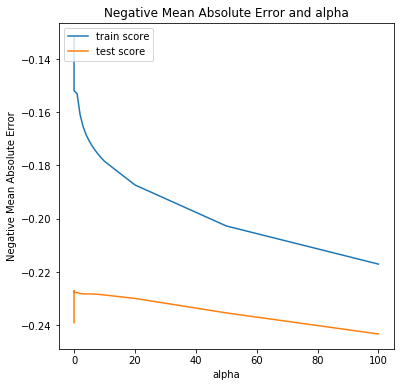

In [351]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

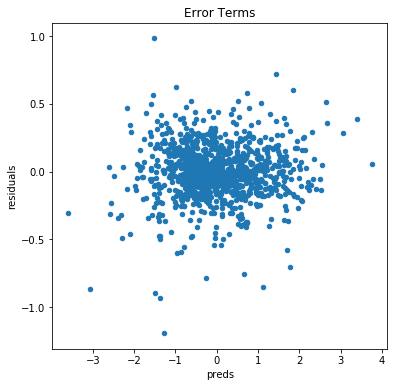

In [352]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":ridge_cv.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title('Error Terms')
plt.show()

In [353]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 0.4}
-0.22707968033322298


Ridge regression puts constraint on the coefficients. The penalty term (alpha) regularizes the coefficients such that if the coefficients take large values, the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.

Lets understand the plot and the best parameters:

1. From the plot we can see, with the initial values of alpha:0.0001, th training MSE is -ve and the test error is -ve
2. As the alpha values increases the error terms decrease and tend to increase in -ve coeficient/error minizes which is overfitting.
3. Therefore, at the point of alpha:0.4 the model seems to explain the error terms well.
4. The MSE is: -0.22

In [354]:
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 8.08590779e-03,  6.07575804e-02,  3.48560697e-03,  4.66506731e-02,
        1.86667393e-02,  7.37205764e-03,  6.13897461e-02,  1.14861624e-01,
        1.16264160e-01, -5.49034528e-03,  1.80559956e-01,  3.98127317e-02,
        3.92821806e-03,  3.60724847e-02,  2.02801820e-02,  1.35294254e-02,
       -5.35925404e-02,  1.45307405e-02, -1.47928791e-03,  6.68502019e-02,
        3.67992725e-02,  2.56597359e-02,  1.12722283e-02,  1.61988487e-02,
        1.53157914e-02,  2.26954296e-02, -2.29166433e-02,  8.69162072e-03,
       -7.42653433e-04, -1.32798529e-01, -5.62437859e-02,  9.35949432e-03,
        3.63406589e-04,  1.37940465e-01, -9.81027998e-02, -2.99185717e-02,
       -1.95373811e-01,  1.37364564e-01,  5.05428111e-03,  1.61115338e-01,
       -8.62192958e-02,  4.84055456e-02,  1.61633586e-01,  4.76766901e-02,
        3.94093848e-02, -2.32861273e-01, -7.73418742e-02, -1.87822298e-02,
       -8.19674869e-01,  2.72286076e-01,  2.30842442e-01,  2.25870534e-01,
        9.06758175e-02, -

In [355]:
#Making a dataframe with coefficents of LASSO and variable names
(list(zip(X_train.columns,ridge.coef_)))
var=[]
Coef=[]
for i,j in list(zip(X_train.columns,ridge.coef_)):
    var.append(i)
    Coef.append(j)
ridge_coef= pd.DataFrame(Coef,index=var)
ridge_coef= ridge_coef.reset_index()
ridge_coef.rename(columns={0:'Coef','index':'Features'}, inplace=True)
ridge_coef.sort_values(by='Coef', ascending=False)
ridge_coef= ridge_coef.reset_index()
ridge_coef= ridge_coef.drop(['index'], axis=1)
ridge_coef= ridge_coef.sort_values(by='Coef', ascending=False)
ridge_coef.head(11)


,Features,Coef
306,PoolQC_Ex,0.871426
307,PoolQC_Fa,0.646504
112,Condition2_Norm,0.524929
113,Condition2_PosA,0.491347
139,OverallQual_9,0.475924
117,Condition2_RRNn,0.462919
163,RoofMatl_WdShngl,0.459889
111,Condition2_Feedr,0.443378
155,RoofStyle_Shed,0.439252
158,RoofMatl_Membran,0.416758


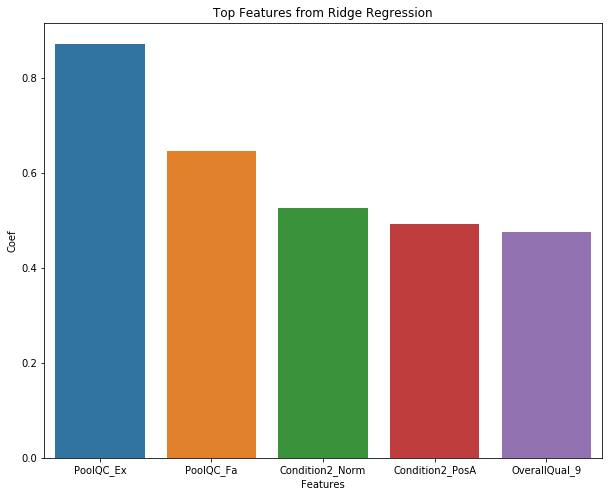

In [356]:
top=ridge_coef.iloc[0:5]
plt.figure(figsize=(10,8))
plt.title("Top Features from Ridge Regression")
sns.barplot(x='Features', y='Coef', data=top)
plt.show()

### Ridge Regression: Model Analysis
- In this case, the optimal value for alpha is: 0.4 and the negative MSE is -0.22707. We will also see the evaluation for the Lasso model

## Lasso Regression

In [357]:
lasso = Lasso()
l_params = {'alpha': [0.0001, 0.001,0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]}

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = l_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    3.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [358]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)
# cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.149200,0.065081,0.000998,0.001093,0.0001,{'alpha': 0.0001},-0.222266,-0.225005,-0.232757,-0.218390,-0.202742,-0.220234,0.009926,4,-0.135213,-0.137496,-0.136130,-0.135950,-0.138971,-0.136752,0.001332
1,0.094747,0.021677,0.000199,0.000399,0.001,{'alpha': 0.001},-0.195180,-0.224885,-0.228418,-0.198560,-0.180873,-0.205573,0.018226,1,-0.161766,-0.156888,-0.154745,-0.157967,-0.164495,-0.159172,0.003502
2,0.100730,0.030596,0.001396,0.001850,0.001,{'alpha': 0.001},-0.195180,-0.224885,-0.228418,-0.198560,-0.180873,-0.205573,0.018226,1,-0.161766,-0.156888,-0.154745,-0.157967,-0.164495,-0.159172,0.003502
3,0.043284,0.004166,0.000599,0.000489,0.002,{'alpha': 0.002},-0.201636,-0.229859,-0.236252,-0.200696,-0.194544,-0.212587,0.016997,3,-0.178253,-0.170034,-0.168069,-0.177383,-0.181673,-0.175083,0.005166
4,0.032314,0.003314,0.002194,0.002918,0.003,{'alpha': 0.003},-0.211356,-0.235587,-0.246655,-0.211858,-0.212609,-0.223601,0.014721,5,-0.196054,-0.179714,-0.182891,-0.193647,-0.200747,-0.190611,0.007999


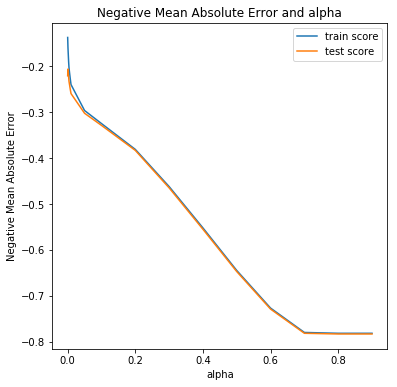

In [359]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

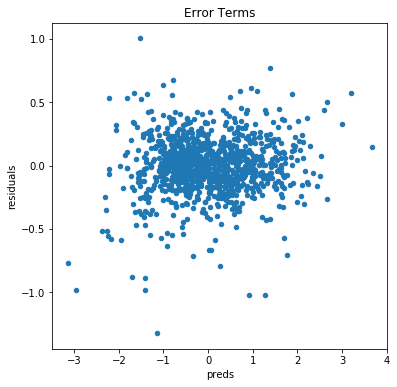

In [360]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":lasso_cv.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title('Error Terms')
plt.show()

In [361]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.20557324953289005


Lets understand the Lasso NMSE error and alpha plot:
    
1. From the plot we can see, with the initial values of alpha:0, the training error is -ve and the test error is overlapped with it.
2. As the alpha values increases the eroor terms rise and tend to move towards zero which is overfitting.
3. Therefore, at the point of alpha:0.4 the model seems to explain the error terms well.
4. The MSE is: -0.22

In [362]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [363]:
(lasso.coef_)

array([ 4.36688299e-03,  3.96826618e-02,  1.13121611e-02,  3.94824382e-02,
        1.67201757e-02, -0.00000000e+00,  8.91796512e-02,  0.00000000e+00,
        4.63231845e-03, -1.84673669e-02,  3.43489186e-01,  4.38749124e-02,
        5.14359296e-03,  4.25594886e-02,  1.99113082e-02,  8.95069862e-04,
       -4.84647385e-02,  2.05539862e-02,  1.19255799e-02,  7.00392398e-02,
        3.35642106e-02,  2.81776073e-02,  1.36065734e-02,  1.69124976e-02,
        1.13911575e-02,  2.42452439e-02, -6.91027650e-03,  0.00000000e+00,
       -1.08110708e-04, -1.20746412e-01, -6.76257600e-02,  7.58144809e-03,
        4.59048571e-03,  2.08311895e-02, -2.21404303e-01, -0.00000000e+00,
        0.00000000e+00,  1.10824763e-02, -3.59920810e-02,  7.34733986e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.24198112e-01, -0.00000000e+00, -0.00000000e+00,
       -8.87595570e-01,  0.00000000e+00,  2.83569692e-03,  0.00000000e+00,
       -1.27435388e-01, -

In [364]:
#Making a dataframe with coefficents of LASSO and variable names
(list(zip(X_train.columns,lasso.coef_)))
var=[]
Coef=[]
for i,j in list(zip(X_train.columns,lasso.coef_)):
    var.append(i)
    Coef.append(j)
Lasso_coef= pd.DataFrame(Coef,index=var)
Lasso_coef= Lasso_coef.reset_index()
Lasso_coef.rename(columns={0:'Coef','index':'Features'}, inplace=True)
Lasso_coef.sort_values(by='Coef', ascending=False)
Lasso_coef= Lasso_coef.reset_index()
Lasso_coef= Lasso_coef.drop(['index'], axis=1)
Lasso_coef= Lasso_coef.sort_values(by='Coef', ascending=False)
Lasso_coef.head(11)


,Features,Coef
139,OverallQual_9,0.452963
10,GrLivArea,0.343489
82,Neighborhood_Crawfor,0.297178
140,OverallQual_10,0.257070
138,OverallQual_8,0.256683
149,OverallCond_9,0.200651
80,Neighborhood_ClearCr,0.167612
97,Neighborhood_Somerst,0.163780
167,Exterior1st_BrkFace,0.158841
273,Functional_Typ,0.156628


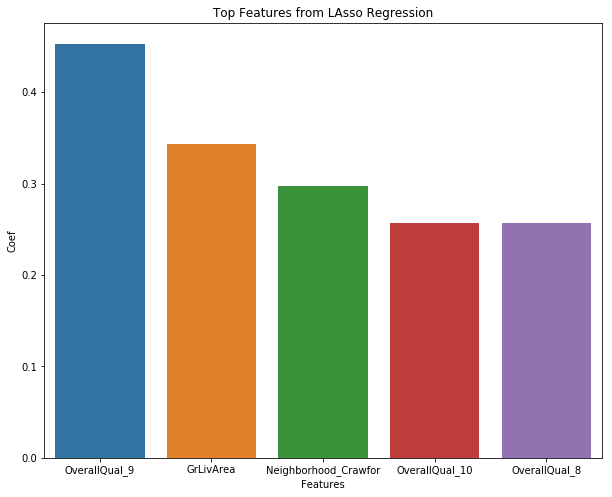

In [365]:
top=Lasso_coef.iloc[0:5]
plt.figure(figsize=(10,8))
plt.title("Top Features from LAsso Regression")
sns.barplot(x='Features', y='Coef', data=top)
plt.show()


### Lasso Regression: Model Analysis
- In this case, the optimal value for alpha is: 0.001 negative MSE is -0.20557. This lasso mse is slightly better compared to the negative MSE of Ridge which is -0.22707
- Therefore we selct the Lasso Model variables for our model as lasso is efficient in making variable coeficents to zero resulting in good variable selection.

## Regularization method selcted is **Lasso because of low Negative MSE**.

Below are the variables are significant in predicting the price of a house:
- OverallQual_9
- GrLivArea
- Neighborhood_Crawfor
- OverallQual_10
- OverallQual_8

How well those variables describe the price of a house:

The optimal value of lambda for ridge and lasso regression:



### Question 2: 
#### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 

### Ridge:
Ridge: 0.4

With:
-Double Value: 0.8



In [366]:
alpha = 0.8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.61877859e-04,  5.51402278e-02,  1.75496916e-03,  3.17288212e-02,
        1.72866109e-02,  6.04206296e-03,  4.44662343e-02,  1.10842459e-01,
        1.16530019e-01, -4.28959155e-03,  1.77879499e-01,  4.51728521e-02,
        5.19662803e-03,  4.17362122e-02,  2.35402339e-02,  1.50566620e-02,
       -5.19597406e-02,  2.04341101e-02, -1.37283608e-03,  7.85554640e-02,
        2.91625073e-02,  2.71699454e-02,  9.53135231e-03,  1.69587906e-02,
        1.67083749e-02,  2.41576697e-02, -2.51464338e-02,  7.69911006e-03,
       -1.48098593e-03, -1.23417148e-01, -5.59771406e-02,  9.67403472e-03,
        3.94092025e-03,  1.18775487e-01, -1.23869859e-01, -2.18401273e-02,
       -1.31946299e-01,  1.21853459e-01, -2.85326913e-02,  1.46496427e-01,
       -1.46210737e-02,  3.76230525e-02,  1.35601844e-01,  5.40500031e-02,
        2.92722812e-02, -2.23098645e-01, -8.93029319e-02, -1.04609249e-02,
       -7.56217582e-01,  2.47473908e-01,  2.15755956e-01,  2.08293770e-01,
        8.46939484e-02, -

In [367]:
#Making a dataframe with coefficents of LASSO and variable names
(list(zip(X_train.columns,ridge.coef_)))
var=[]
Coef=[]
for i,j in list(zip(X_train.columns,ridge.coef_)):
    var.append(i)
    Coef.append(j)
ridge_coef= pd.DataFrame(Coef,index=var)
ridge_coef= ridge_coef.reset_index()
ridge_coef.rename(columns={0:'Coef','index':'Features'}, inplace=True)
ridge_coef.sort_values(by='Coef', ascending=False)
ridge_coef= ridge_coef.reset_index()
ridge_coef= ridge_coef.drop(['index'], axis=1)
ridge_coef= ridge_coef.sort_values(by='Coef', ascending=False)
ridge_coef.head(11)

,Features,Coef
306,PoolQC_Ex,0.705534
139,OverallQual_9,0.466110
307,PoolQC_Fa,0.437643
163,RoofMatl_WdShngl,0.426690
112,Condition2_Norm,0.412560
113,Condition2_PosA,0.357195
323,SaleType_ConLD,0.344913
111,Condition2_Feedr,0.324867
140,OverallQual_10,0.297164
117,Condition2_RRNn,0.296453


### Lasso:
-Lasso: 0.001

In [368]:
alpha =0.002

lasso_new = Lasso(alpha=alpha)
        
lasso_new.fit(X_train, y_train) 
lasso_new.coef_

array([-2.36167642e-03,  3.47483335e-02,  1.04448318e-02,  9.52952419e-03,
        7.59756170e-03, -0.00000000e+00,  8.03900963e-02,  0.00000000e+00,
        3.98005990e-03, -1.52083342e-02,  3.35895839e-01,  5.65639069e-02,
        9.89357633e-03,  5.40204892e-02,  2.38697186e-02,  0.00000000e+00,
       -5.19960605e-02,  2.69886429e-02,  2.28013908e-02,  9.00438027e-02,
        2.03843848e-02,  3.18159593e-02,  6.55120641e-03,  1.64536597e-02,
        1.14397519e-02,  2.59779292e-02, -1.97428289e-02, -0.00000000e+00,
       -0.00000000e+00, -9.77982168e-02, -7.86619507e-02,  1.00954996e-02,
        0.00000000e+00,  3.96997724e-02, -2.22693673e-01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.72642075e-02,  4.77186762e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.77807516e-02, -0.00000000e+00, -0.00000000e+00,
       -7.90954982e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.31459904e-01, -

In [369]:
#Making a dataframe with coefficents of LASSO and variable names
(list(zip(X_train.columns,lasso_new.coef_)))
var=[]
Coef=[]
for i,j in list(zip(X_train.columns,lasso_new.coef_)):
    var.append(i)
    Coef.append(j)
Lasso_coef= pd.DataFrame(Coef,index=var)
Lasso_coef= Lasso_coef.reset_index()
Lasso_coef.rename(columns={0:'Coef','index':'Features'}, inplace=True)
Lasso_coef.sort_values(by='Coef', ascending=False)
Lasso_coef= Lasso_coef.reset_index()
Lasso_coef= Lasso_coef.drop(['index'], axis=1)
Lasso_coef= Lasso_coef.sort_values(by='Coef', ascending=False)
# Lasso_coef.loc[Lasso_coef['Features']=='OverallQual_10',:]
Lasso_coef[:11]


,Features,Coef
139,OverallQual_9,0.388706
10,GrLivArea,0.335896
82,Neighborhood_Crawfor,0.280437
138,OverallQual_8,0.245682
263,KitchenQual_Ex,0.173118
97,Neighborhood_Somerst,0.171572
92,Neighborhood_NridgHt,0.167251
273,Functional_Typ,0.154459
226,BsmtExposure_Gd,0.152257
167,Exterior1st_BrkFace,0.140318


## Question 3

After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


### Important ad Top-5 variables of Lasso regularization 
- OverallQual_9
- GrLivArea
- Neighborhood_Crawfor
- OverallQual_10
- OverallQual_8

In [370]:
#Removing the important variables from Lasso regularization
laso_col=['OverallQual_9','GrLivArea','Neighborhood_Crawfor','OverallQual_10','OverallQual_8']

#Droppping the imp variables from the train set
X_train=X_train.drop(laso_col, axis=1)

### Performing Ridge Regression after removing imp variables

In [371]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [372]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009175,7.461875e-04,0.000798,0.000399,0.0001,{'alpha': 0.0001},-0.241656,-0.238374,-0.262164,-0.241020,-0.221389,-0.240921,0.012954,24,-0.130858,-0.134553,-0.132631,-0.132453,-0.134862,-0.133071,0.001475
1,0.008577,4.882468e-04,0.000399,0.000488,0.001,{'alpha': 0.001},-0.234989,-0.238251,-0.259752,-0.240730,-0.221131,-0.238967,0.012401,23,-0.130919,-0.134557,-0.132730,-0.132535,-0.135038,-0.133156,0.001488
2,0.008976,6.106495e-07,0.000000,0.000000,0.01,{'alpha': 0.01},-0.242603,-0.237316,-0.250365,-0.238729,-0.219487,-0.237705,0.010168,22,-0.131374,-0.134638,-0.133110,-0.132808,-0.135589,-0.133504,0.001470
3,0.012167,1.163203e-03,0.000200,0.000399,0.05,{'alpha': 0.05},-0.242276,-0.235563,-0.243074,-0.233321,-0.214381,-0.233731,0.010374,12,-0.133111,-0.135288,-0.134106,-0.133928,-0.137396,-0.134766,0.001488
4,0.010174,1.163916e-03,0.000398,0.000487,0.1,{'alpha': 0.1},-0.240035,-0.235223,-0.240922,-0.229788,-0.211913,-0.231585,0.010600,6,-0.135300,-0.136272,-0.135488,-0.135721,-0.139609,-0.136478,0.001599


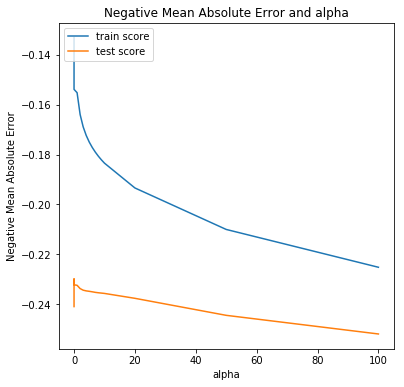

In [373]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [374]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 0.3}
-0.2298506191565026


In [375]:
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.17814903e-02,  6.41011590e-02,  5.60735015e-03,  5.40058125e-02,
        1.82754358e-02,  7.57126018e-03,  6.88868241e-02,  2.53322441e-01,
        2.64561574e-01,  9.60402732e-03,  3.91927347e-02,  3.51060001e-03,
        3.32905061e-02,  1.61049459e-02,  1.04478445e-02, -5.80230949e-02,
        1.71657150e-02,  8.34044085e-03,  6.87028459e-02,  3.34899656e-02,
        2.80310651e-02,  1.20666737e-02,  1.65772536e-02,  1.35266090e-02,
        2.25854209e-02, -2.11003677e-02,  9.94528900e-03, -1.10756744e-03,
       -1.32114065e-01, -5.78205719e-02,  9.78659530e-03, -2.44399119e-03,
        1.45331510e-01, -9.13202870e-02, -5.39559791e-03, -2.22619345e-01,
        1.45765351e-01,  2.60798437e-02,  1.98777911e-01, -1.41744084e-01,
        4.61855367e-02,  1.66688686e-01,  4.84629818e-02,  3.30548505e-02,
       -2.44133526e-01, -9.06287591e-02, -1.45050715e-02, -8.54576654e-01,
        2.89670673e-01,  2.37280457e-01,  2.38252896e-01,  8.93726287e-02,
       -1.12573230e-01,  

In [376]:
#Making a dataframe with coefficents of LASSO and variable names
(list(zip(X_train.columns,ridge.coef_)))
var=[]
Coef=[]
for i,j in list(zip(X_train.columns,ridge.coef_)):
    var.append(i)
    Coef.append(j)
ridge_coef= pd.DataFrame(Coef,index=var)
ridge_coef= ridge_coef.reset_index()
ridge_coef.rename(columns={0:'Coef','index':'Features'}, inplace=True)
ridge_coef.sort_values(by='Coef', ascending=False)
ridge_coef= ridge_coef.reset_index()
ridge_coef= ridge_coef.drop(['index'], axis=1)
ridge_coef= ridge_coef.sort_values(by='Coef', ascending=False)
ridge_coef.head(11)


,Features,Coef
301,PoolQC_Ex,0.943642
302,PoolQC_Fa,0.728670
111,Condition2_PosA,0.587433
110,Condition2_Norm,0.579852
150,RoofStyle_Shed,0.530117
115,Condition2_RRNn,0.529179
153,RoofMatl_Membran,0.495916
158,RoofMatl_WdShngl,0.493186
109,Condition2_Feedr,0.468902
304,PoolQC_No Pool,0.422535


### Performing Lasso Regularization after removing imp variables

In [377]:
lasso = Lasso()
l_params = {'alpha': [0.0001, 0.001,0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = l_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [378]:
cv_results = pd.DataFrame(Lasso_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.093748,0.055427,0.000398,0.000487,0.0001,{'alpha': 0.0001},-0.224098,-0.227694,-0.234569,-0.220518,-0.204858,-0.222349,0.009897,2,-0.136623,-0.139039,-0.137681,-0.137406,-0.139932,-0.138136,0.001189
1,0.018949,0.000892,0.000798,0.000399,0.001,{'alpha': 0.001},-0.202691,-0.234395,-0.230355,-0.203817,-0.188205,-0.211883,0.017647,1,-0.163642,-0.159264,-0.159148,-0.161820,-0.168097,-0.162394,0.003309
2,0.011569,0.000489,0.000399,0.000489,0.01,{'alpha': 0.01},-0.233862,-0.279984,-0.278800,-0.255571,-0.268364,-0.263287,0.017166,3,-0.249578,-0.231034,-0.238959,-0.250784,-0.256689,-0.245409,0.009184
3,0.010372,0.000489,0.000599,0.000489,0.05,{'alpha': 0.05},-0.283215,-0.319572,-0.319814,-0.301993,-0.316692,-0.308233,0.014150,4,-0.312084,-0.276024,-0.294975,-0.310633,-0.313939,-0.301531,0.014434
4,0.010372,0.000488,0.000399,0.000489,0.1,{'alpha': 0.1},-0.315407,-0.359270,-0.356943,-0.335182,-0.361109,-0.345552,0.017771,5,-0.348505,-0.317747,-0.333495,-0.345974,-0.351763,-0.339497,0.012511


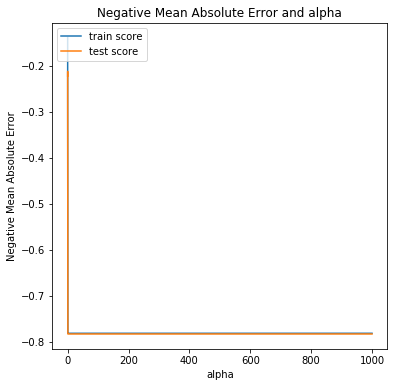

In [379]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [380]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.21188344154382563


In [381]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
len(lasso.coef_)

330

In [382]:

#Making a dataframe with coefficents of LASSO and variable names
(list(zip(X_train.columns,lasso.coef_)))
var=[]
Coef=[]
for i,j in list(zip(X_train.columns,lasso.coef_)):
    var.append(i)
    Coef.append(j)
Lasso_coef= pd.DataFrame(Coef,index=var)
Lasso_coef= Lasso_coef.reset_index()
Lasso_coef.rename(columns={0:'Coef','index':'Features'}, inplace=True)
Lasso_coef.sort_values(by='Coef', ascending=False)
Lasso_coef= Lasso_coef.reset_index()
Lasso_coef= Lasso_coef.drop(['index'], axis=1)
Lasso_coef= Lasso_coef.sort_values(by='Coef', ascending=False)
Lasso_coef.head(11)


,Features,Coef
8,2ndFlrSF,0.288856
7,1stFlrSF,0.255780
144,OverallCond_9,0.209164
258,KitchenQual_Ex,0.195711
95,Neighborhood_Somerst,0.170145
162,Exterior1st_BrkFace,0.158421
268,Functional_Typ,0.152988
38,MSSubClass_70,0.151025
96,Neighborhood_StoneBr,0.146246
90,Neighborhood_NridgHt,0.143117


### Below are the top 5 variables after removing and remodelling the regularization methods.
#### Since the Mean square error MSE is low for Lasso model we will go with the lasso model for chossing the top 5 variables.

1. 2ndFlrSF  
2. 1stFlrSF  
3. OverallCond_9  
4. KitchenQual_Ex 
5. Neighborhood_Somerst 
